In [58]:
import numpy as np 
import scipy 
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import StandardScaler 

In [59]:
import matplotlib.pyplot as plt 
import matplotlib
import seaborn as sbn 
matplotlib.style.use('ggplot')
%matplotlib inline 

In [73]:
num_centroids = 3
X_train, true_labels = make_blobs(n_samples=1000, n_features=2, centers=num_centroids)

In [74]:
type(X_train), type(true_labels), X_train.shape, true_labels.shape

(numpy.ndarray, numpy.ndarray, (1000, 2), (1000,))

In [75]:
X_tran = StandardScaler().fit_transform(X_train)
X_train.shape

(1000, 2)

In [76]:
unique_labels = np.unique(true_labels)

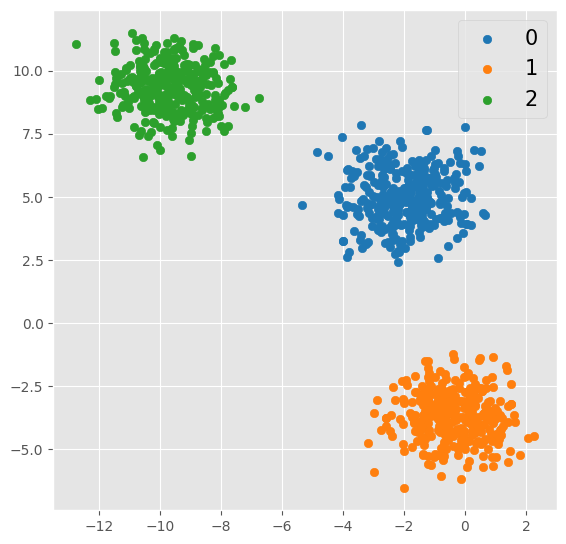

In [77]:
fig, ax = plt.subplots(1, figsize=(6.5, 6.5))
colors = ['tab:blue', 'tab:orange', 'tab:green']
for idx, label in enumerate(unique_labels):
    mask = true_labels == label
    tmp_X = X_train[mask]
    ax.scatter(tmp_X[:, 0], tmp_X[:, 1], c=colors[idx], label=label)
ax.legend(loc='best', fontsize=15,)

In [92]:
class KMeans():
    
    def __init__(self, num_centroids):
        self.num_centroids = num_centroids
        
    def fit(self, X, n_iters=20):
        # initialize the centroids 
        indices = np.random.choice(X.shape[0], self.num_centroids, replace=False)
        centroids = X[indices, :].copy()
        loss_history = []
        for iter_idx in range(n_iters):
            # compute the distances to the centroids 
            dist_matrix = scipy.spatial.distance_matrix(X, centroids) # shape: (N, K)
            
            # cluster assignment
            cluster_label = np.argmin(dist_matrix, axis=1) # shape: (N,)
            
            # re-compute the centroids
            for k in range(self.num_centroids):
                centroids[k] = np.mean(X[cluster_label == k, :], axis=0)
            
            # compute the loss
            loss_i = 0.
            for k in range(self.num_centroids):
                centroid_k = centroids[k].reshape((1, -1))
                distaince_to_k = scipy.spatial.distance_matrix(X[cluster_label == k], centroid_k)
                loss_i += (distaince_to_k ** 2).sum()
            
            loss_history.append(loss_i)
        
        return cluster_label, loss_history 
        

In [93]:
kmeans = KMeans(num_centroids=num_centroids)
cluster_label, loss_history = kmeans.fit(X_train)

Text(0.5, 1.0, 'K=3')

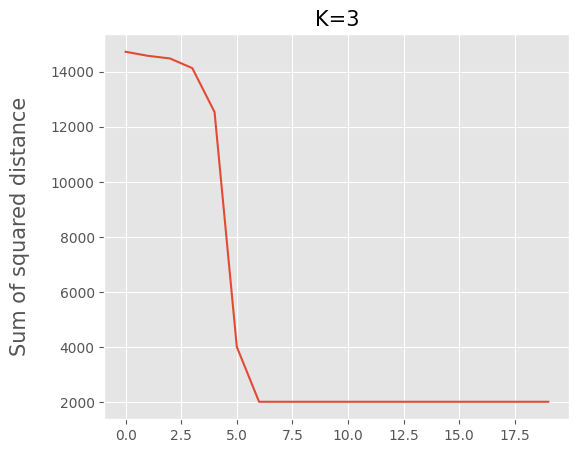

In [94]:
fig, ax = plt.subplots(1, figsize=(6, 5))
ax.plot(loss_history)
ax.set_ylabel('Sum of squared distance', fontsize=15, labelpad=15)
ax.set_title(f'K={num_centroids}', fontsize=15)

In [95]:
loss_by_k = []
for k in [2, 3, 4, 5, 6]:
    kmeans = KMeans(num_centroids=k)
    _, loss_history = kmeans.fit(X_train)
    loss_by_k.append(loss_history[-1])

Text(0.5, 1.0, 'Elbow plot')

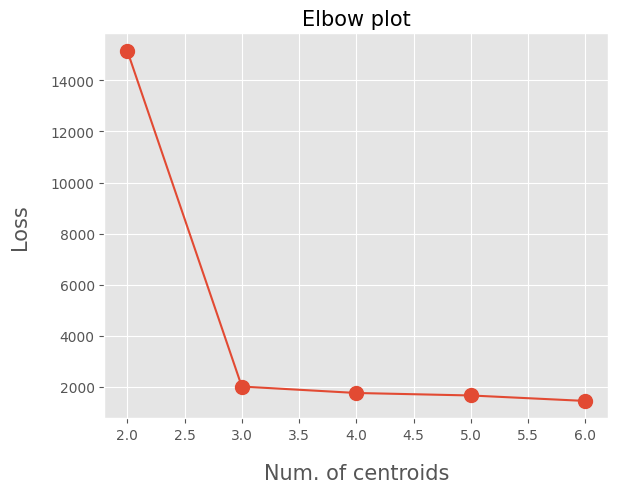

In [101]:
fig, ax = plt.subplots(1, figsize=(6.5, 5))
ax.plot(range(2, 7), loss_by_k, marker='o', markersize=10)
ax.set_xlabel('Num. of centroids', fontsize=15, labelpad=15)
ax.set_ylabel('Loss', fontsize=15, labelpad=15)
ax.set_title('Elbow plot', fontsize=15)